# Build a model to perform Sentimental Analysis on Flipkart Reviews.





# Objective: -

Flipkart is one of the leading e-commerce companies/platforms based in India, which currently competes with Snapdeal, Myntra, Nykaa, and IndiaMART. Since the world is digitizing rapidly, e-commerce platforms are booming and making the best way possible to make and provide their services to the people.

The sentiment analysis of the product reviews is a way that can open ways to understand the performance of the products, which is beneficial for both future customers and the e-commerce platform. The e-commerce company can improve its product and customer services with the sentiment analysis technique. Sentiment analysis can also help the company better understand the product and plan further regarding products
Sentiment analysis is contextual mining of text which identifies and extracts subjective information in source material, and helping a business to understand the social sentiment of their brand, product or service while monitoring online conversations.

The goal of this challenge is to build a machine learning model that perform Sentimental Analysis on Flipkart reviews.

# Dataset: -

The dataset is openly available at Kaggle.

**Two real-valued features:**

1. Review
2. Rating

# Step 1: Import all the required libraries

- __Pandas__ : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- __Sklearn__ : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- __Pickle__ : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- __Seaborn__ : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- __Matplotlib__ : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

In [1]:
#Loading libraries 
import pandas as pd
import seaborn as sns
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.naive_bayes import BernoulliNB
import warnings

warnings.filterwarnings('ignore')

# Step 2 : Read dataset and basic details of dataset
Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.


In this stage we are going to read our problem dataset and have a look on it.

In [2]:
#loading the dataset
try:
    df = pd.read_csv('C:/My Sample Notebook/Notebook Template/Flipkart Review Sentimental Analysis/data/data.csv') #Path for the file
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")   

Data read done successfully...


In [3]:
# To view the content inside the dataset we can use the head() method that returns a specified number of rows, string from the top. 
# The head() method returns the first 5 rows if a number is not specified.
df.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


# Step3: Data Preprocessing

**Why need of Data Preprocessing?**

Preprocessing data is an important step for data analysis. The following are some benefits of preprocessing data:

 - It improves accuracy and reliability. Preprocessing data removes missing or inconsistent data values resulting from human or computer error, which can improve the accuracy and quality of a dataset, making it more reliable.
 - It makes data consistent. When collecting data, it's possible to have data duplicates, and discarding them during preprocessing can ensure the data values for analysis are consistent, which helps produce accurate results.
 - It increases the data's algorithm readability. Preprocessing enhances the data's quality and makes it easier for machine learning algorithms to read, use, and interpret it.

**Why we drop column?**

Axis are defined for arrays with more than one dimension. A 2-dimensional array has two corresponding axes: the first running vertically downwards across rows (axis 0) 
and the second running horizontally across columns (axis 1).

After we read the data, we can look at the data using:

In [4]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 9976 rows and 2 columns


#### The df.value_counts() method counts the number of types of values a particular column contains. 

In [5]:
df.shape

(9976, 2)

#### The df.shape method shows the shape of the dataset. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  9976 non-null   object
 1   rating  9976 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 156.0+ KB


#### The df.info() method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. 

In [7]:
df.iloc[1]

review    awesome sound....very pretty to see this nd th...
rating                                                    5
Name: 1, dtype: object

####  df.iloc[ ] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. The iloc property gets, or sets, the value(s) of the specified indexes.

### Data Type Check for every column

**Why data type check is required?**

Data type check helps us with understanding what type of variables our dataset contains. It helps us with identifying whether to keep that variable or not. If the dataset contains contiguous data, then only float and integer type variables will be beneficial and if we have to classify any value then categorical variables will be beneficial.

In [8]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)

In [9]:
print("Total number of categorical columns are ", len(objects_lst))
print("There names are as follows: ", objects_lst)

Total number of categorical columns are  1
There names are as follows:  ['review']


In [10]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)

In [11]:
print("Total number of numerical columns are ", len(int64_lst))
print("There names are as follows: ", int64_lst)

Total number of numerical columns are  1
There names are as follows:  ['rating']


In [12]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)

In [13]:
print("Total number of float64 columns are ", len(float64_lst))
print("There name are as follow: ", float64_lst)

Total number of float64 columns are  0
There name are as follow:  []


## Step 2 Insights: -

1) We have total 2 features where 1 is object type and other is integer type.

After this step we have to calculate various evaluation parameters which will help us in cleaning and analysing the data more accurately.

# Step 3: Descriptive Analysis

**Goal/Purpose:**  Finding the data distribution of the features. Visualization helps to understand data and also to explain the data to another person.

Things we are going to do in this step:

1. Mean
2. Median
3. Mode
4. Standard Deviation
5. Variance
6. Null Values
7. NaN Values
8. Min value
9. Max value
10. Count Value
11. Quatilers
12. Correlation
13. Skewness

In [14]:
df.describe()

,rating
count,9976.000000
mean,4.215417
std,1.167911
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### The df.describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value. 

# Measure the variability of data of the dataset

Variability describes how far apart data points lie from each other and from the center of a distribution.

# Null and Nan values

1. **Null Values**


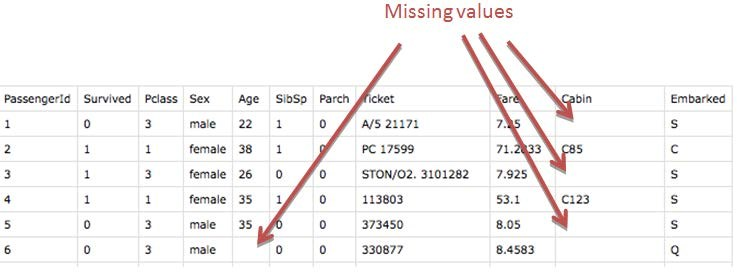

A null value in a relational database is used when the value in a column is unknown or missing. A null is neither an empty string (for character or datetime data types) nor a zero value (for numeric data types).

In [15]:
df.isnull().sum()

review    0
rating    0
dtype: int64

As we notice that there are no null values in our dataset.

2. **Nan Values**

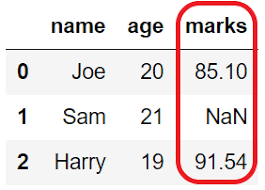

NaN, standing for Not a Number, is a member of a numeric data type that can be interpreted as a value that is undefined or unrepresentable, especially in floating-point arithmetic.

In [16]:
df.isna().sum()

review    0
rating    0
dtype: int64

As we notice that there are no nan values in our dataset.

#### Another way to remove null and nan values is to use the method "df.dropna(inplace=True)". 

### Step 3 Insights: - 

With the statistical analysis we have found that the data have a lot of skewness in them all the columns are positively skewed with mostly zero variance.

Statistical analysis is little difficult to understand at one glance so to make it more understandable we will perform visulatization on the data which will help us to understand the process easily.

### Why we are calculating all these metrics? 

Mean / Median /Mode/ Variance /Standard Deviation are all very basic but very important concept of statistics used in data science. Almost all the machine learning algorithm uses these concepts in data preprocessing steps. These concepts are part of descriptive statistics where we basically used to describe and understand the data for features in Machine learning

<AxesSubplot: xlabel='rating', ylabel='count'>

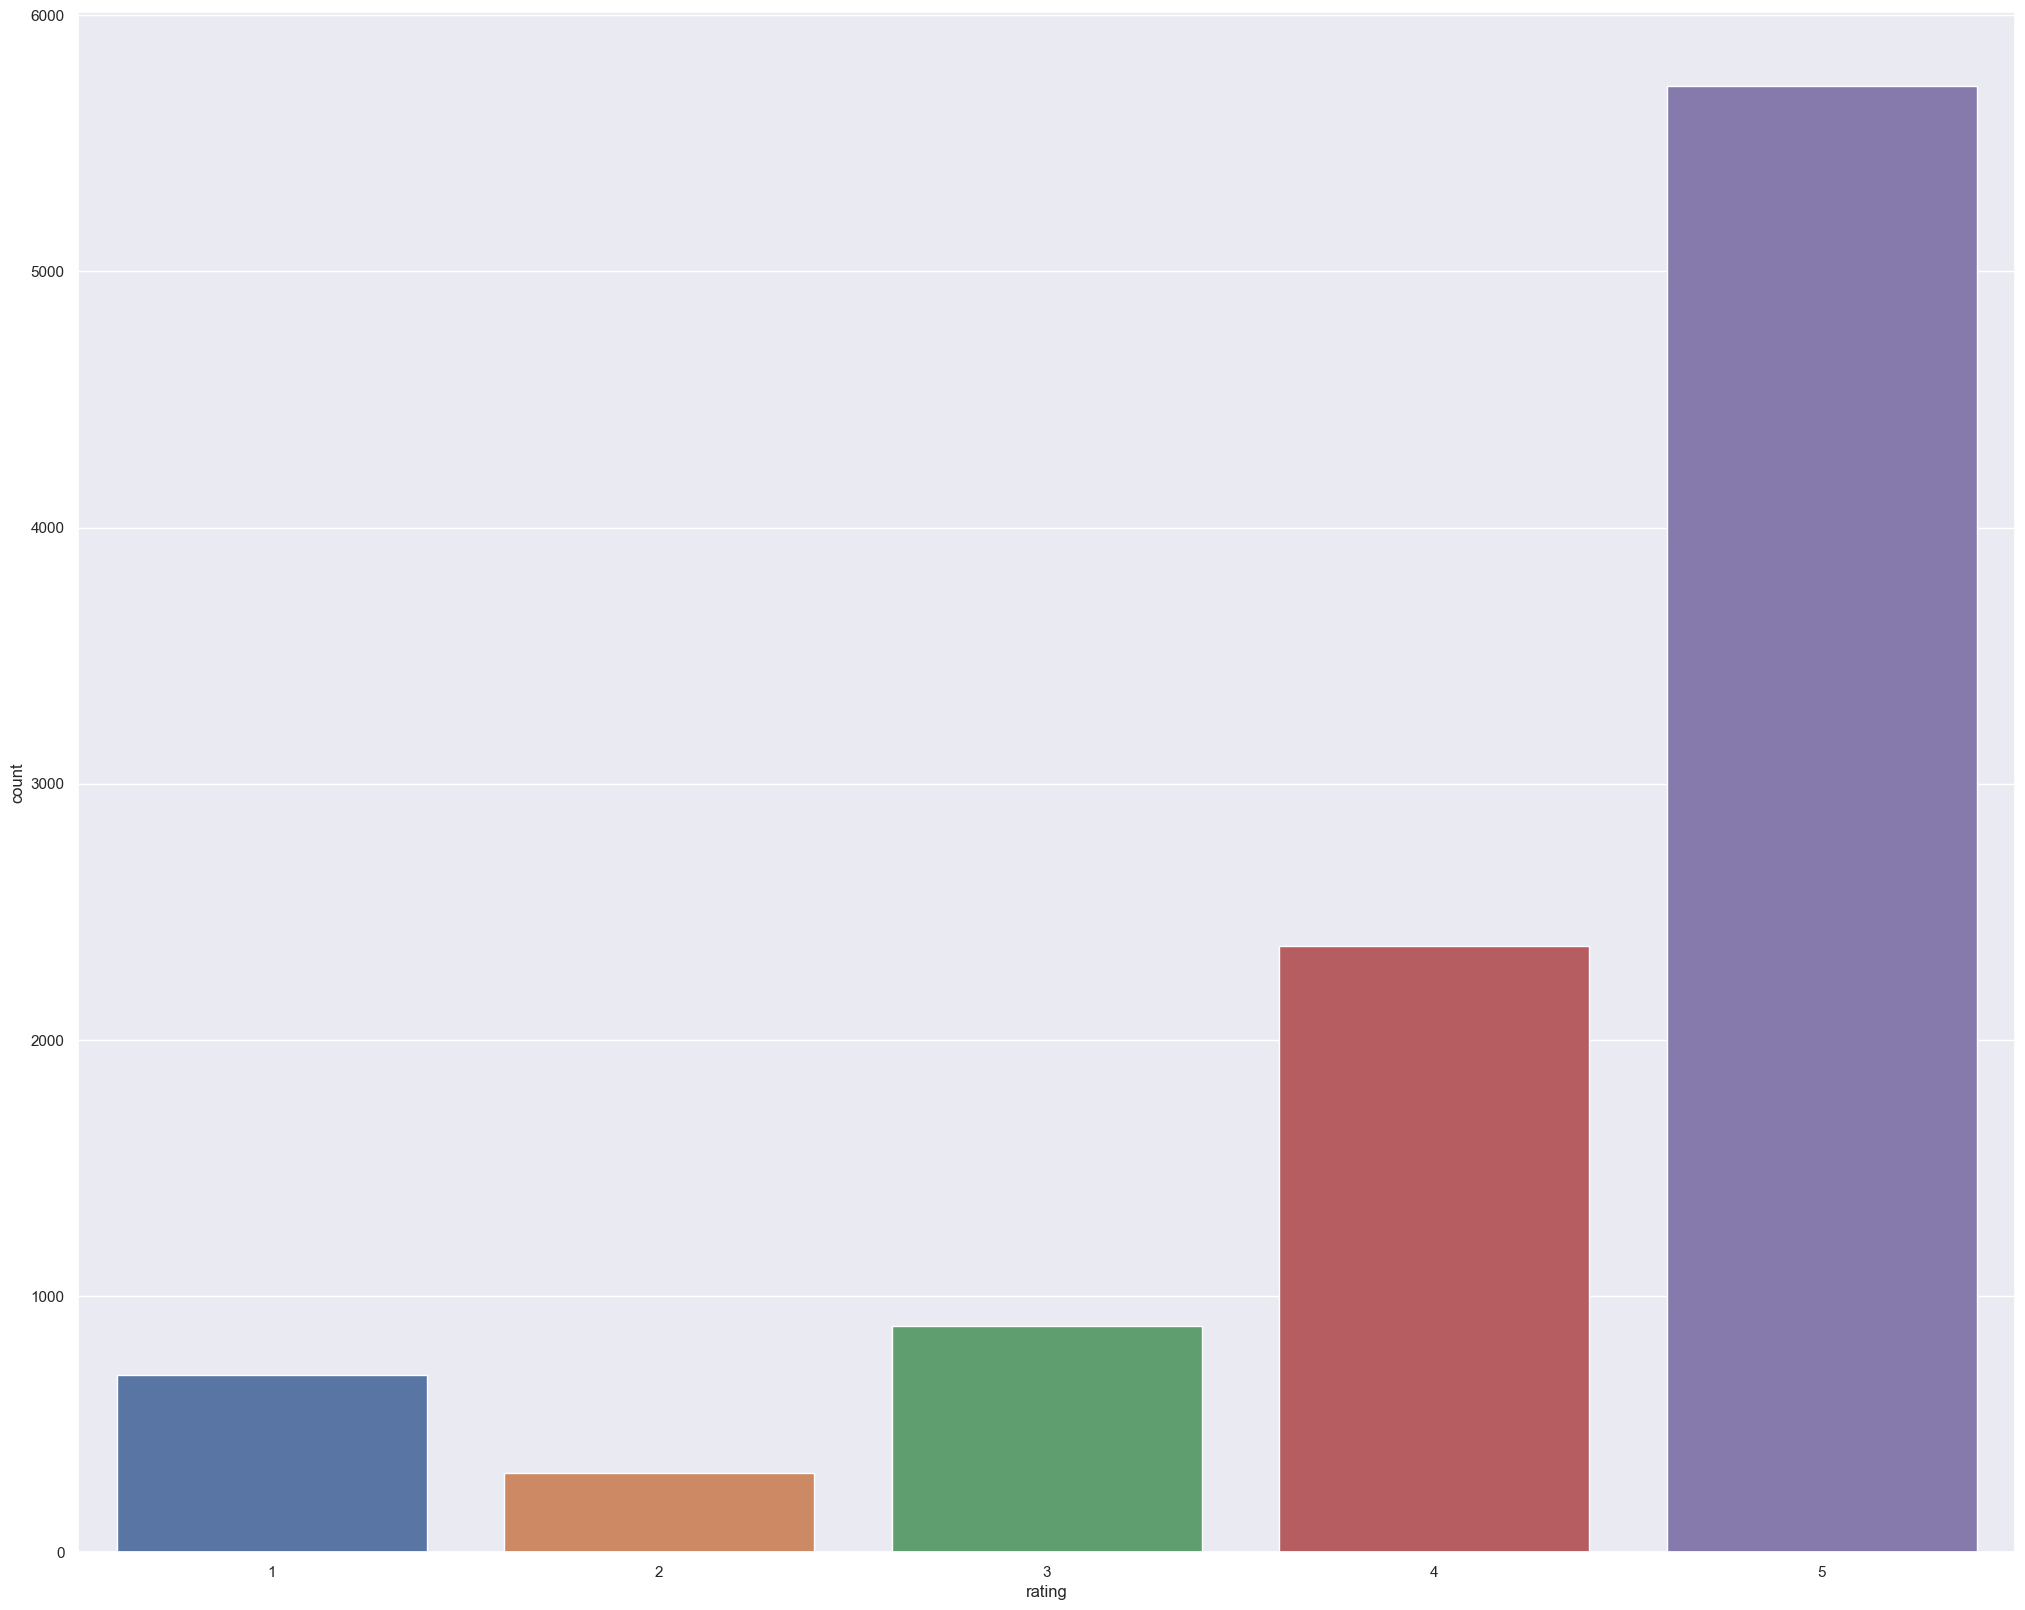

In [23]:
sns.countplot(x = df['rating'])

# Step 4: Data Exploration
**Goal/Purpose:**

Graphs we are going to develop in this step

1. Histogram of all columns to check the distrubution of the columns
2. Distplot or distribution plot of all columns to check the variation in the data distribution
3. Heatmap to calculate correlation within feature variables
4. Boxplot to find out outlier in the feature columns

# 1. Histogram

A histogram is a bar graph-like representation of data that buckets a range of classes into columns along the horizontal x-axis.The vertical y-axis represents the number count or percentage of occurrences in the data for each column

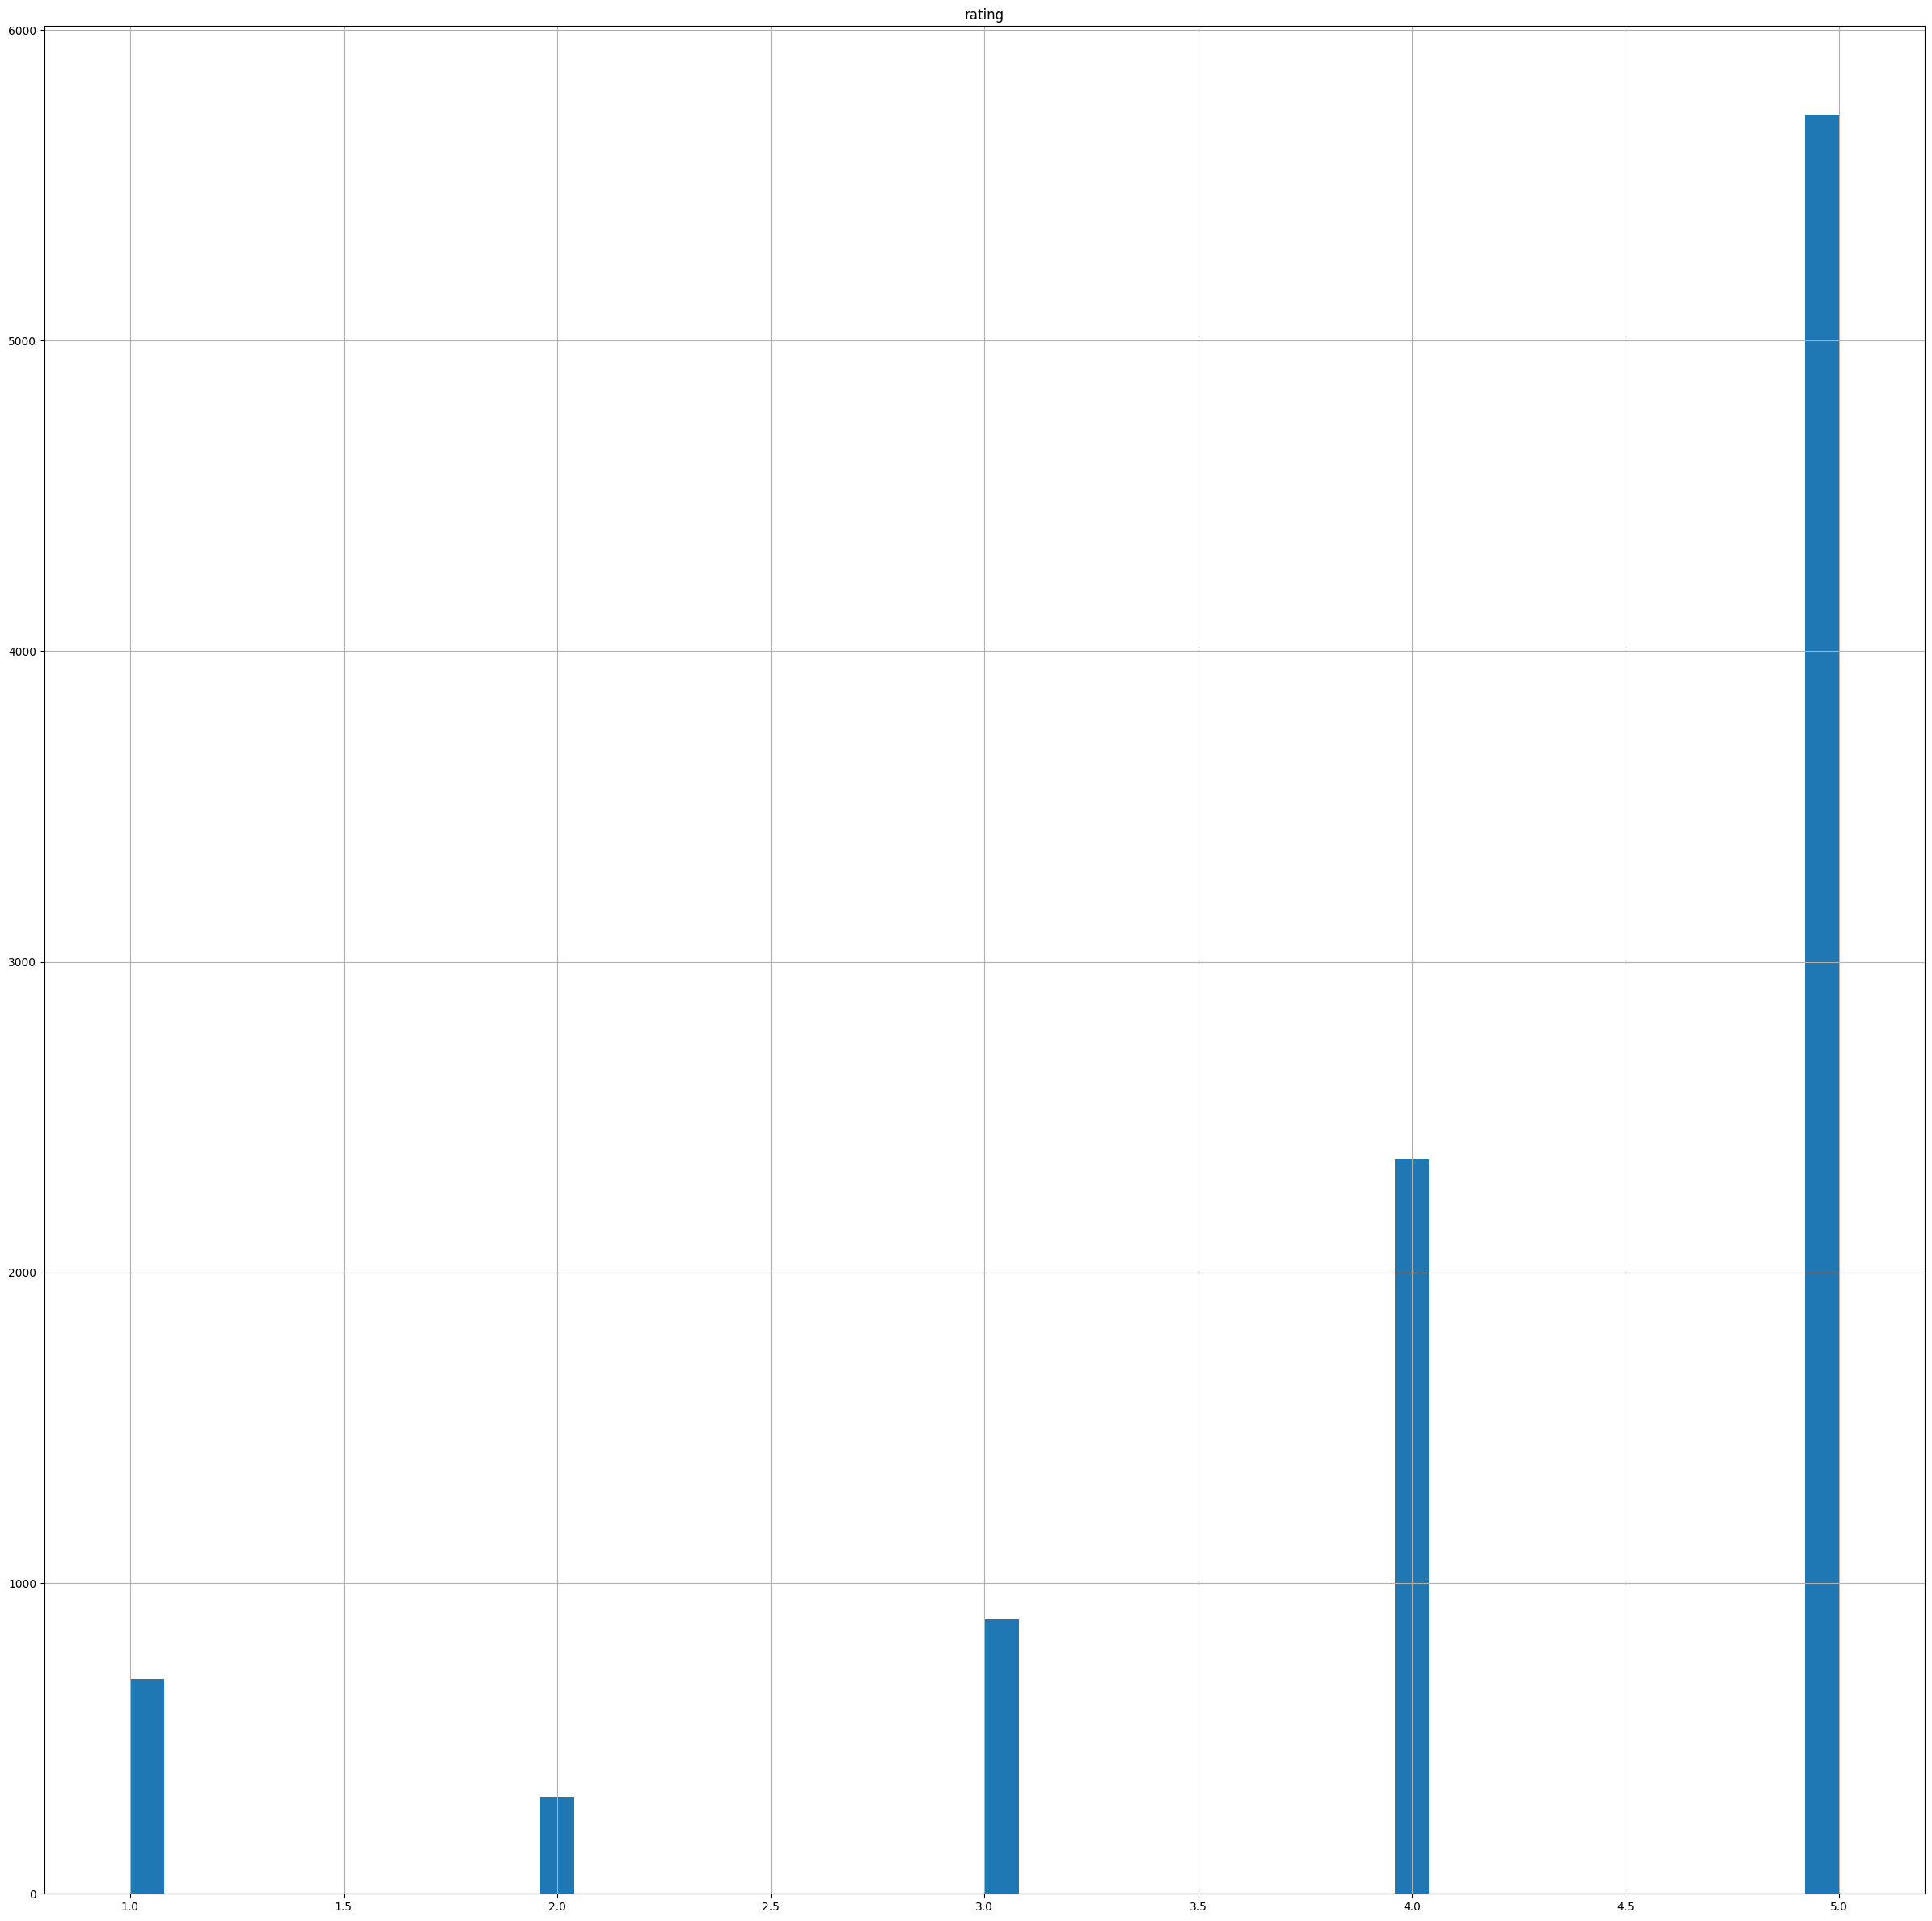

In [17]:
# Distribution in attributes
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(30,30))
plt.show()

### From the above histogram we observed that the most of the ratings for the flipkart product are 5 star ratings which shows the good quality of product.


### Histogram Insight: -

Histogram helps in identifying the following:
- View the shape of your data set’s distribution to look for outliers or other significant data points.

- Determine whether something significant has boccurred from one time period to another.

### Why Histogram? 

It is used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

From the above graphical representation we can identify that the highest bar represents the outliers which is above the maximum range.

We can also identify that the values are moving on the right side, which determines positive and the centered values determines normal skewness.

# 2. Distplot

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it 

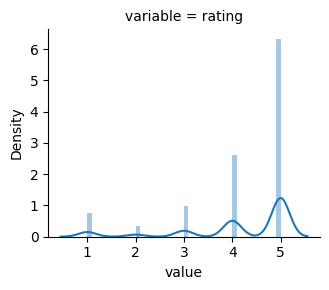

In [18]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

### Distplot Insights: -

Above is the distrution bar graphs to confirm about the statistics of the data about the skewness, the above results are:

2. 1 column i.e CLASSS which is our target variable ~ which is also +ve skewed. In that case we'll need to log transform this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables

### Why Distplot?
Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve. If the bell curve is shifted to the left or the right, it is said to be skewed.

We can observe that the bell curve is shifted to left we indicates positive skewness.As all the column are positively skewed we don't need to do scaling.

Let's proceed and check the distribution of the target variable.


# 3. Heatmap




A heatmap (or heat map) is a graphical representation of data where values are depicted by color.Heatmaps make it easy to visualize complex data and understand it at a glance 

__Correlation__ - A positive correlation is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.

Correlation can have a value:

- 1 is a perfect positive correlation
- 0 is no correlation (the values don't seem linked at all)
- -1 is a perfect negative correlation



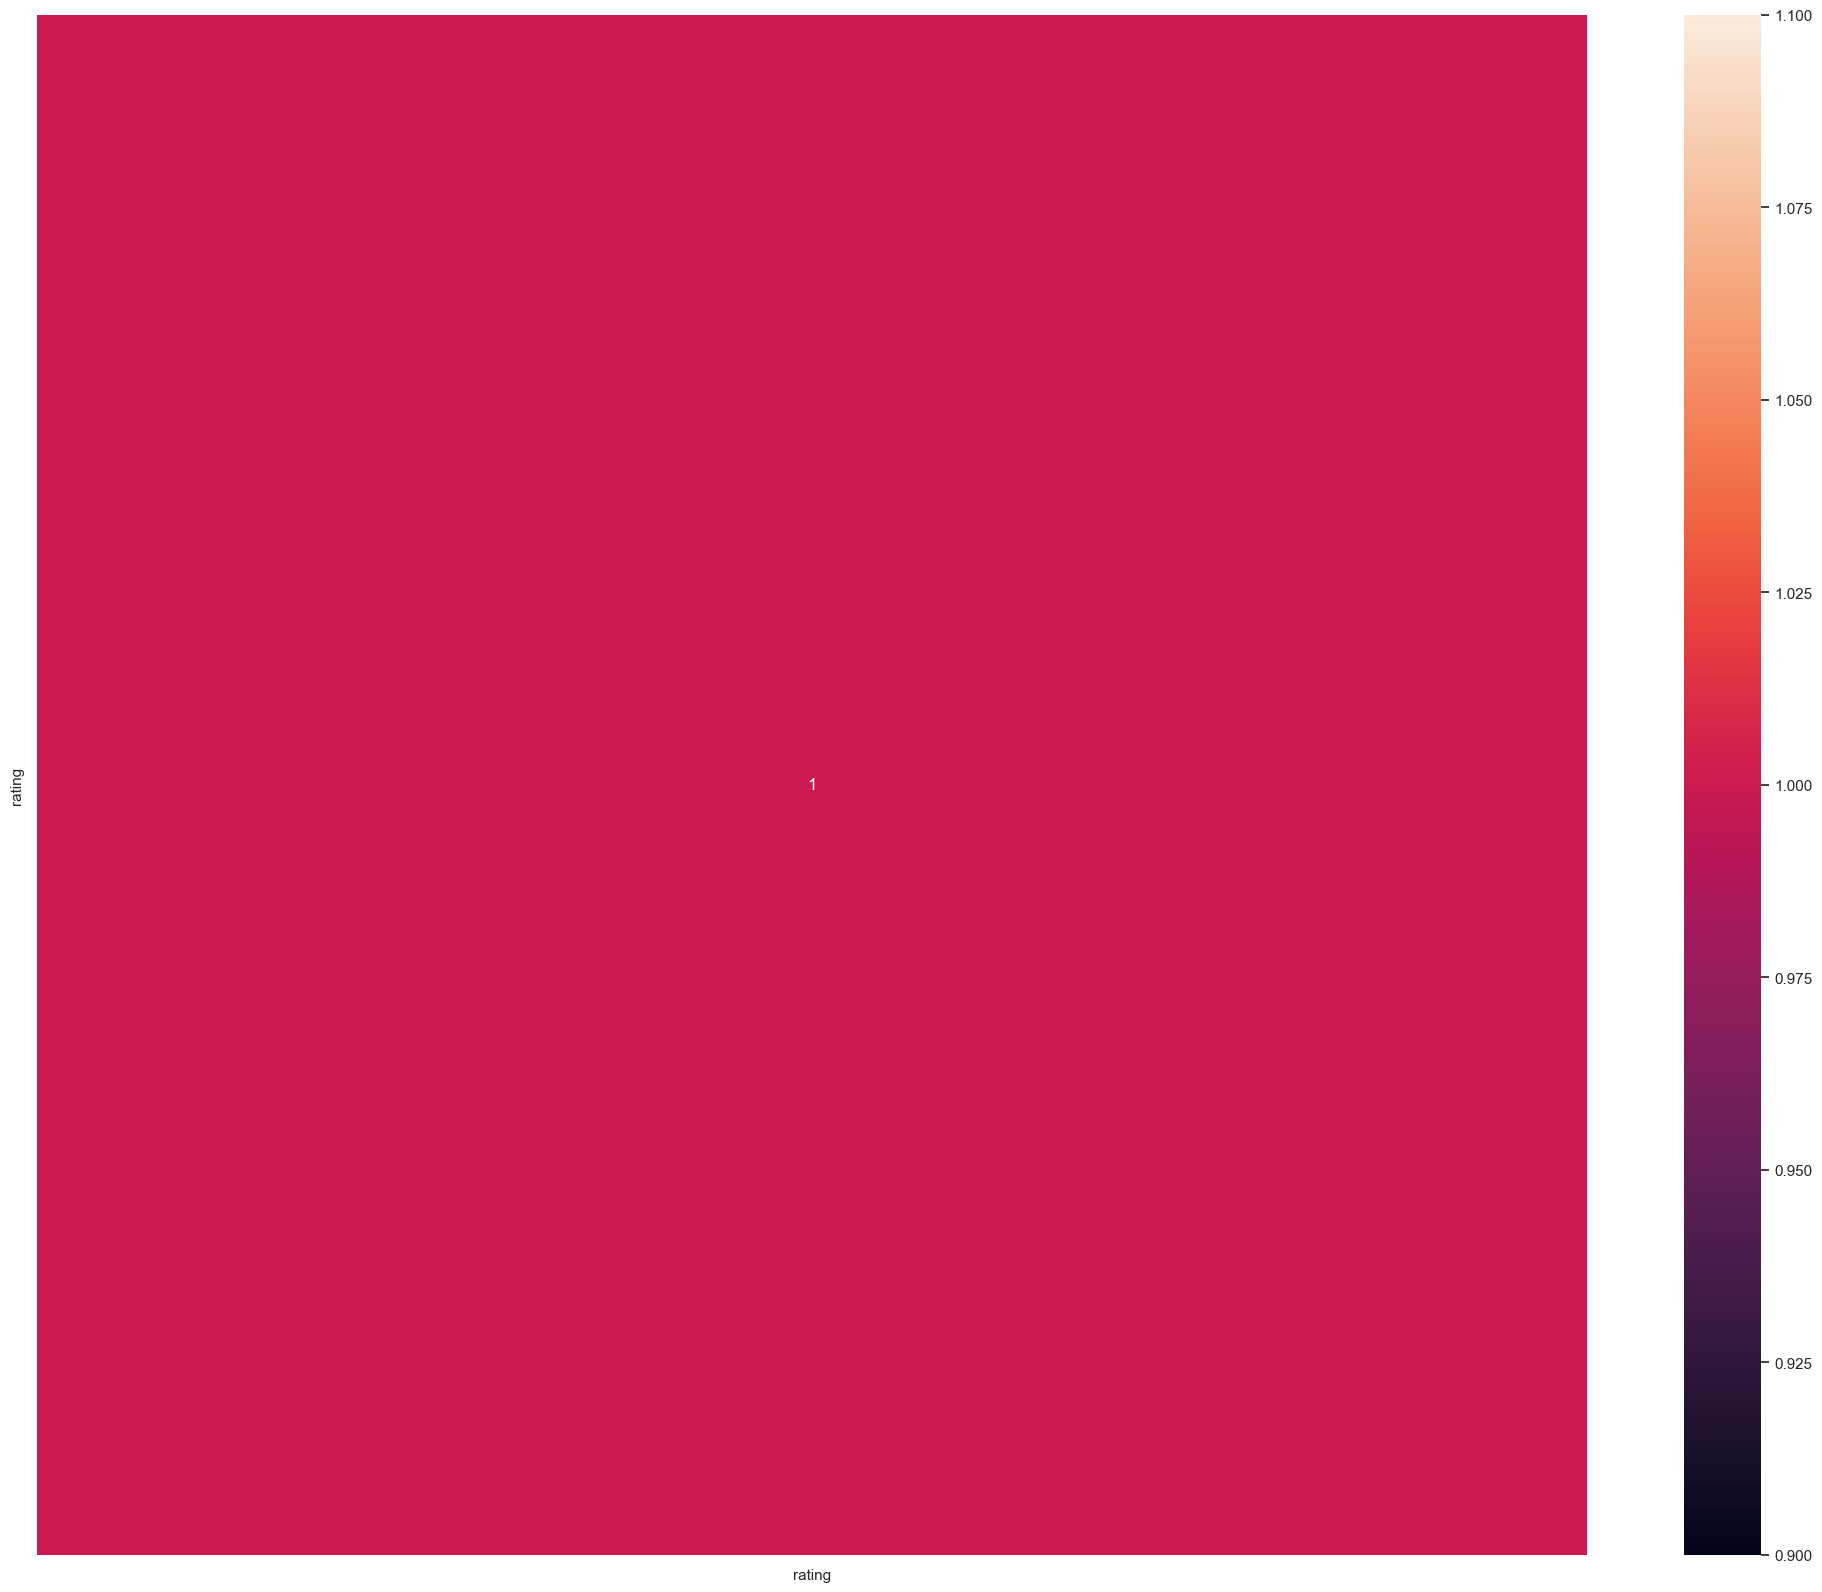

In [19]:
#correlation plot
sns.set(rc = {'figure.figsize':(25,20)})
corr = df.corr().abs()
sns.heatmap(corr,annot=True) 
plt.show()

In [20]:
corr

,rating
rating,1.0


### Heatmap insights: -

As we know, it is recommended to avoid correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, hence increasing the risk of errors.




### Why Heatmap?

Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.

# 4. Boxplot

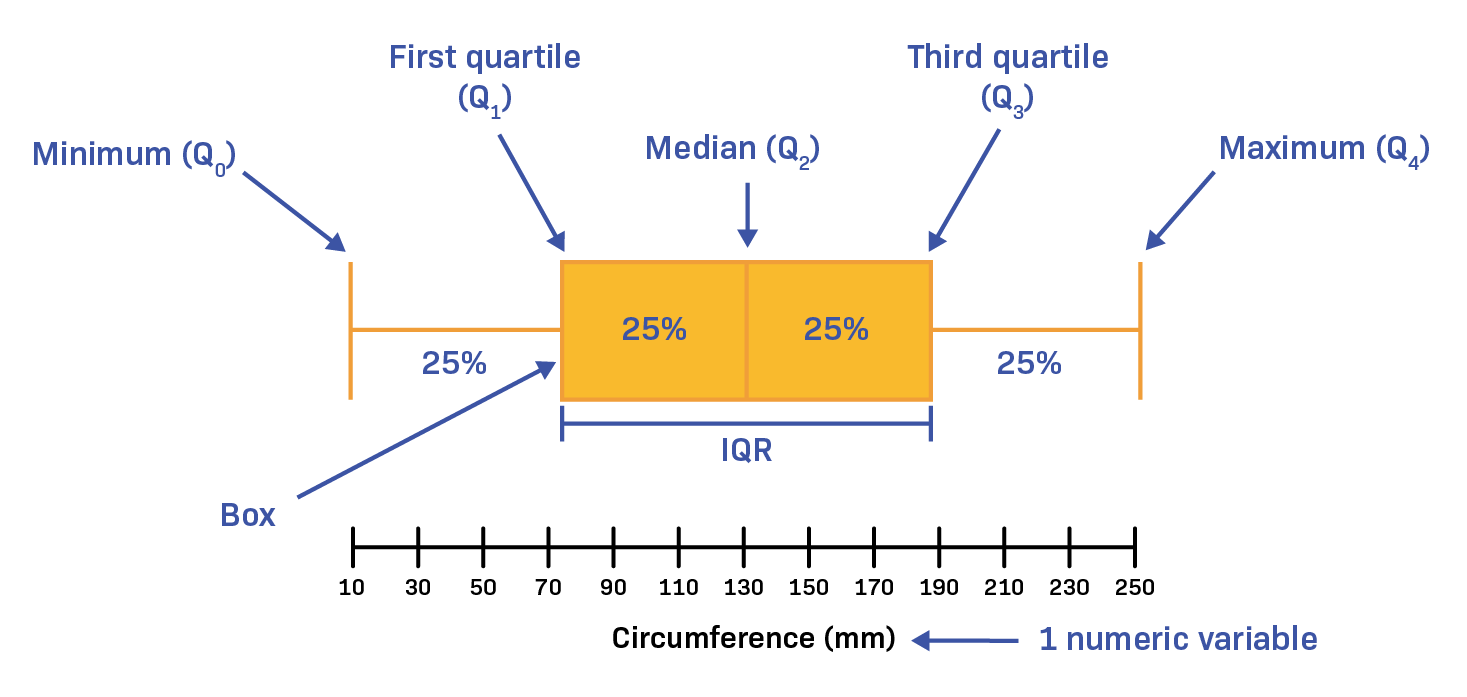

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”).

Basically, to find the outlier in a dataset/column.

#### The dark points are known as Outliers. Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations.

### Boxplot Insights: - 
- Sometimes outliers may be an error in the data and should be removed. In this case these points are correct readings yet they are different from the other points that they appear to be incorrect.

- The best way to decide wether to remove them or not is to train models with and without these data points and compare their validation accuracy.

- So we will keep it unchanged as it won't affect our model.

Here, we can see that most of the variables possess outlier values. It would take us days if we start treating these outlier values one by one. Hence, for now we'll leave them as is and let our algorithm deal with them. As we know, tree-based algorithms are usually robust to outliers.

### Why Boxplot?
Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.



In the next step we will divide our cleaned data into training data and testing data.

### As the problem is based on Natural Language Processing so data visualization isn't needed because majority columns are categorical.

We only need the content and class column from the dataset for the rest of the task. So let’s select both the columns and move further:

In [21]:
df['Class'] = df['rating'].apply(lambda c: 'pos' if c >= 4 else 'neg')

#### The class column contains values pos and neg. pos indicates positive review, and neg indicates negative review. 

In [24]:
df.head()

,review,rating,Class
0,It was nice produt. I like it's design a lot. ...,5,pos
1,awesome sound....very pretty to see this nd th...,5,pos
2,awesome sound quality. pros 7-8 hrs of battery...,4,pos
3,I think it is such a good product not only as ...,5,pos
4,awesome bass sound quality very good bettary l...,5,pos


<AxesSubplot: xlabel='Class', ylabel='count'>

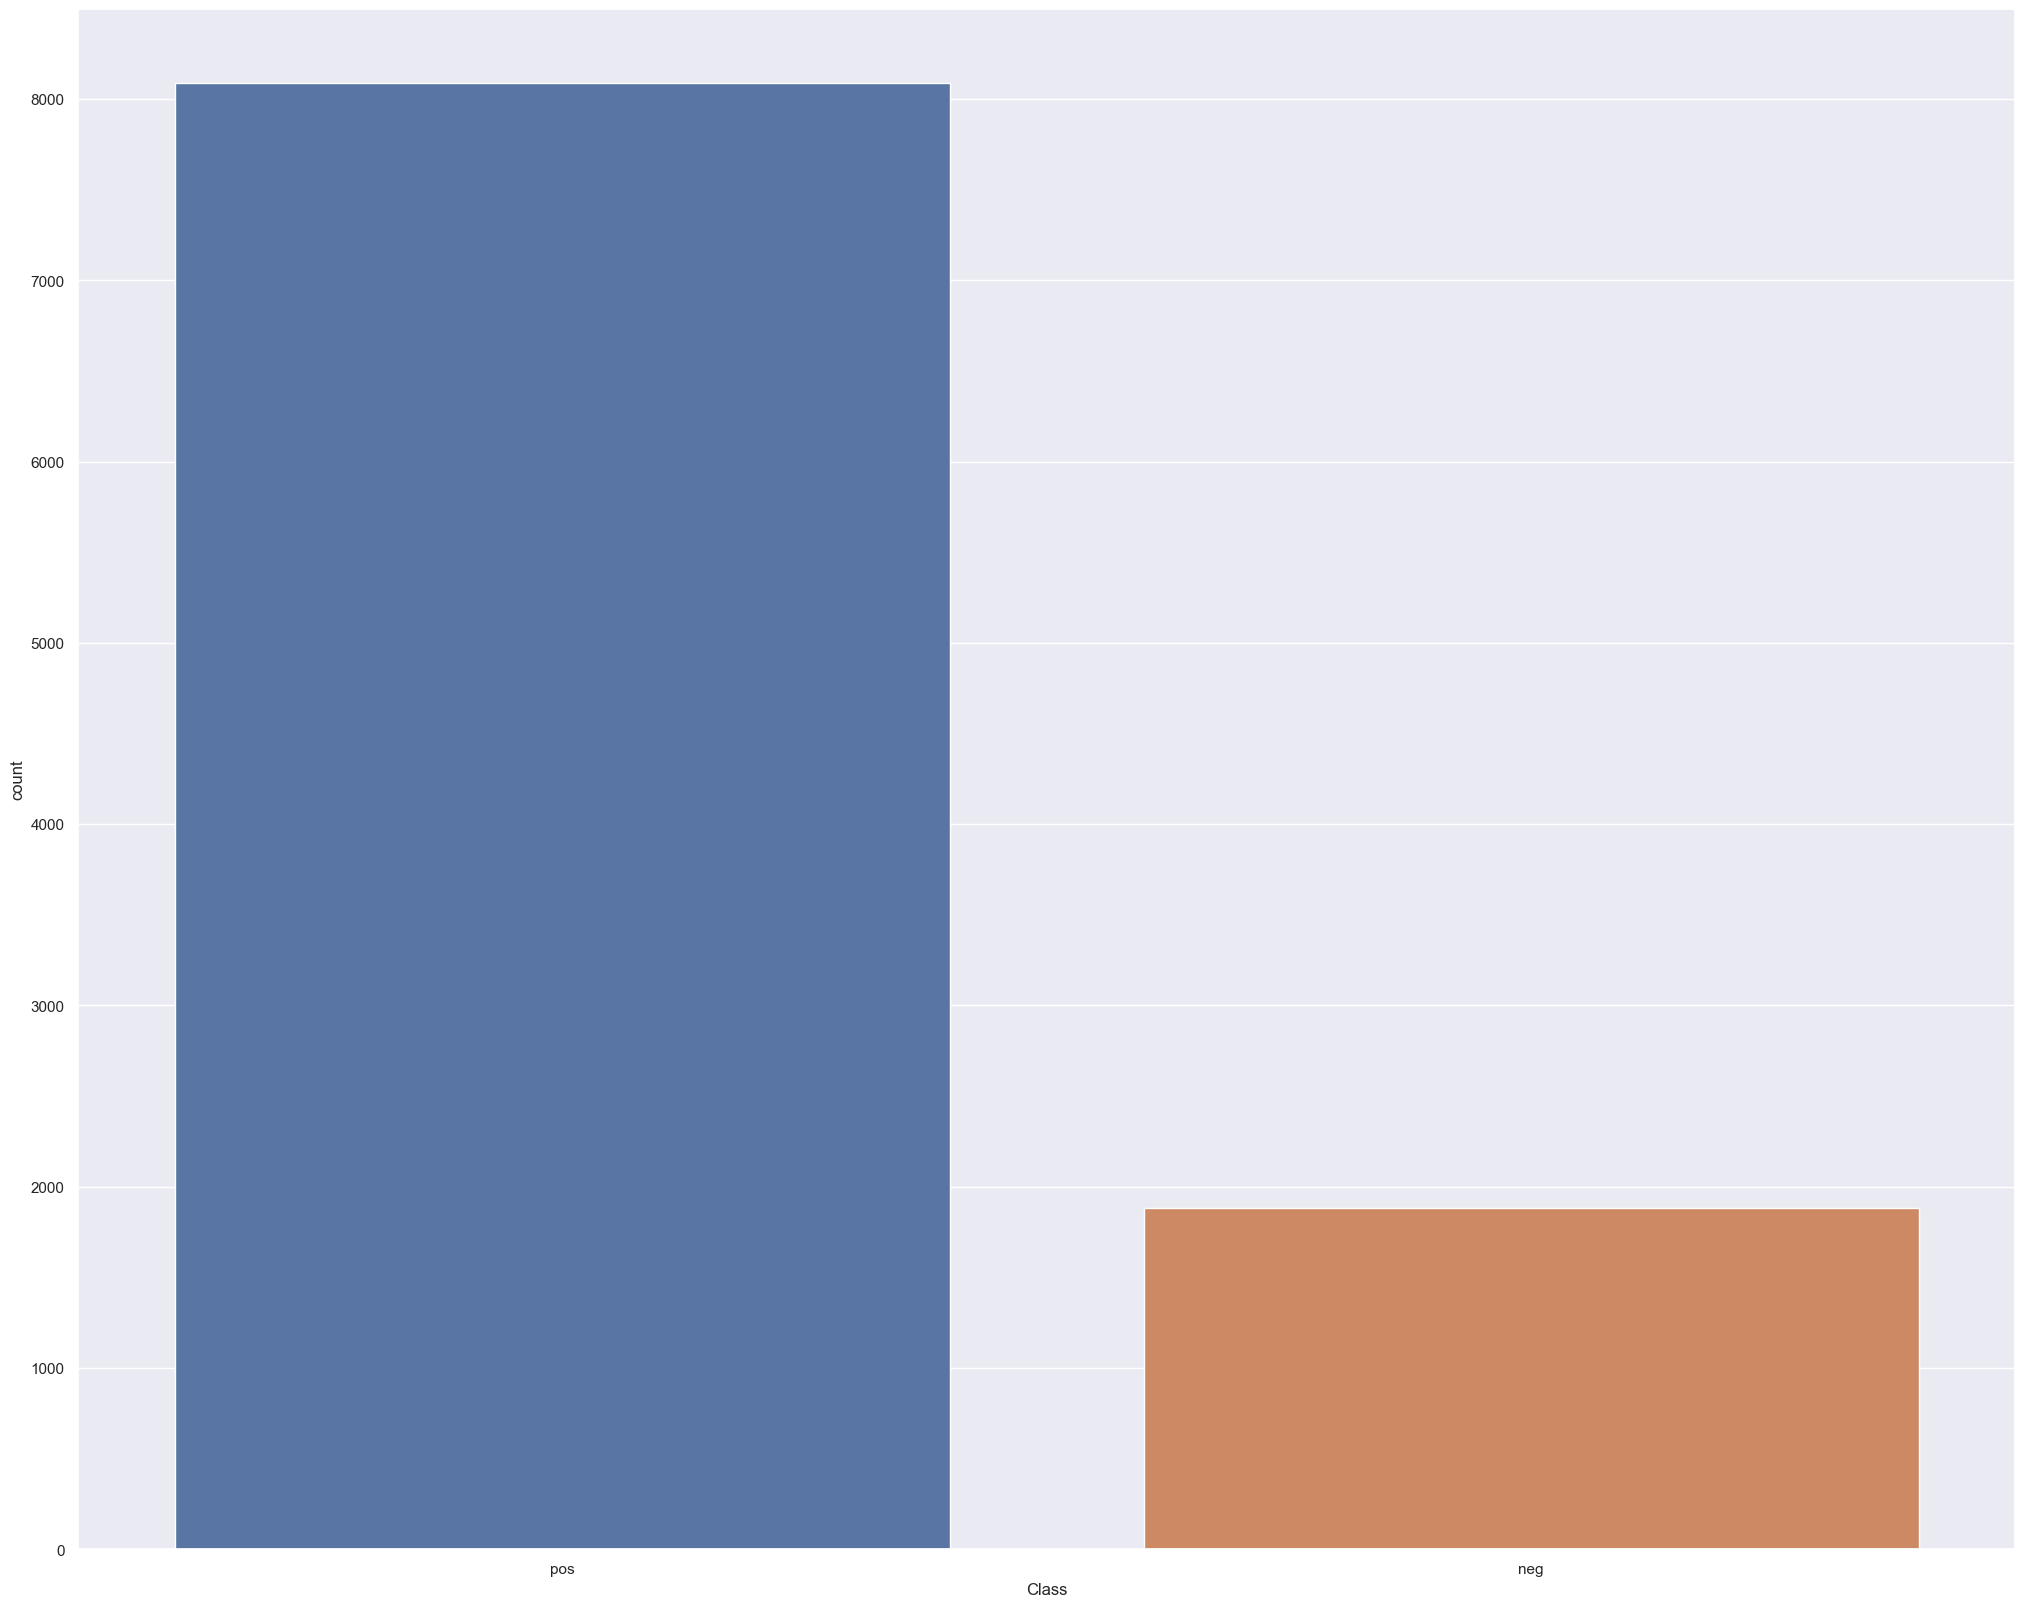

In [25]:
sns.countplot(x = df['Class'])

### We have categorised the rating as positive and negative if the rating is greater than 3 we categorised it as POSITIVE and NEGATIVE.

# Sentiment Analysis
Now that we've seen word vectors we can start to investigate sentiment analysis. The goal is to find commonalities between documents, with the understanding that similarly *combined* vectors should correspond to similar sentiments.

While the scope of sentiment analysis is very broad, we will focus our work in two ways.

### 1. Polarity classification
We won't try to determine if a sentence is objective or subjective, fact or opinion. Rather, we care only if the text expresses a *positive*, *negative* or *neutral* opinion.
### 2. Document level scope
We'll also try to aggregate all of the sentences in a document or paragraph, to arrive at an overall opinion.
### 3. Coarse analysis
We won't try to perform a fine-grained analysis that would determine the degree of positivity/negativity. That is, we're not trying to guess how many stars a reviewer awarded, just whether the review was positive or negative.

# NLTK's VADER module
VADER is an NLTK module that provides sentiment scores based on words used ("completely" boosts a score, while "slightly" reduces it), on capitalization & punctuation ("GREAT!!!" is stronger than "great."), and negations (words like "isn't" and "doesn't" affect the outcome).
<br>To view the source code visit https://www.nltk.org/_modules/nltk/sentiment/vader.html

#### To perfome sentimental analysis on Flipkart Review we have to use VADER module. 

In [26]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nuyap\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

# VADER's `SentimentIntensityAnalyzer()` takes in a string and returns a dictionary of scores in each of four categories:
* negative
* neutral
* positive
* compound *(computed by normalizing the scores above)*

In [28]:
#Here we are creating a new column scores based on the polarity scores.
df['scores'] = df['review'].apply(lambda review: sid.polarity_scores(review))

In [29]:
#Here we are creating a new column compound which will store all the compound score of polarity score. 
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

In [31]:
#This column will compute the result on the basis of compound score.
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

In [32]:
df.head()

,review,rating,Class,scores,compound,comp_score
0,It was nice produt. I like it's design a lot. ...,5,pos,"{'neg': 0.0, 'neu': 0.613, 'pos': 0.387, 'comp...",0.8020,pos
1,awesome sound....very pretty to see this nd th...,5,pos,"{'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'comp...",0.9501,pos
2,awesome sound quality. pros 7-8 hrs of battery...,4,pos,"{'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'comp...",0.9310,pos
3,I think it is such a good product not only as ...,5,pos,"{'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'comp...",0.9851,pos
4,awesome bass sound quality very good bettary l...,5,pos,"{'neg': 0.0, 'neu': 0.595, 'pos': 0.405, 'comp...",0.9053,pos


#### Now we have added comp_score which is calculated using VADER sentimental analysis. 

# Step 2: Data Preparation
**Goal:-**

Tasks we are going to in this step:

1. Now we will spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.
2. Split dataset into train and test dataset.
3. Scaling on train dataset.

**1. Now we spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.**

#### Machines cannot understand characters and words. So when dealing with text data we need to represent it in numbers to be understood by the machine. Countvectorizer is a method to convert text to numerical data. To show you how it works let’s take an example:

text = [‘Hello my name is james, this is my python notebook’]

The text is transformed to a sparse matrix as shown below.

- Hello is james my name notebook python this

- 1      2  1    2  1     1       1      1

# Step 3: Model Training

#### Goal:
In this step we are going to train our dataset on different classification algorithms. As we know that our target variable is in discrete format so we have to apply classification algorithm. Target variable is a category like filtering.In our dataset we have the outcome variable or Dependent variable i.e Y having only two set of values, either Positive or Negative. So we will use Classification algorithm**


K-fold cross validation is a procedure used to estimate the skill of the model on new data. There are common tactics that you can use to select the value of k for your dataset. There are commonly used variations on cross-validation, such as stratified and repeated, that are available in scikit-learn

In [33]:
# Define kfold with 10 split
cv1 = KFold(n_splits=10, shuffle=True, random_state=42)

The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

## Various parameters are calculated for analysing the predictions.

1) Confusion Matrix
2)Classification Report
3)Accuracy Score
4)Precision Score
5)Recall Score
6)F1 Score

## Confusion Matrix

A confusion matrix presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes. It plots a table of all the predicted and actual values of a classifier.

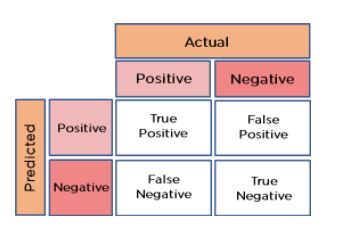

#### This diagram helps in understanding the concept of confusion matrix. 

In [34]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

## Evaluating all kinds of evaluating parameters. 

#### Classification Report :
A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model. 

#### F1_score :
The F1 score is a machine learning metric that can be used in classification models. 

#### Precision_score :
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.

#### Recall_score :
Recall score is used to measure the model performance in terms of measuring the count of true positives in a correct manner out of all the actual positive values. Precision-Recall score is a useful measure of success of prediction when the classes are very imbalanced.

In [35]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  
print("Accuracy using VADER algorithm:-")
print(accuracy_score(df['Class'],df['comp_score']))
  
print(classification_report(df['Class'],df['comp_score']))

cm = confusion_matrix(df['Class'],df['comp_score'])
print(cm)

Accuracy using VADER algorithm:-
0.8556535685645549
              precision    recall  f1-score   support

         neg       0.68      0.44      0.53      1885
         pos       0.88      0.95      0.91      8091

    accuracy                           0.86      9976
   macro avg       0.78      0.70      0.72      9976
weighted avg       0.84      0.86      0.84      9976

[[ 825 1060]
 [ 380 7711]]


<AxesSubplot: >

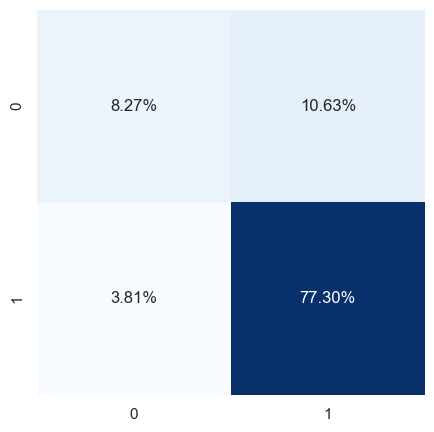

In [36]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)


- As you can see with our VADER algorithm we got 85% accuracy

# Step 4: Save Model
**Goal:- In this step we are going to save our model in pickel format file.**

In [37]:
import pickle
pickle.dump(sid , open('FlipkartReview.pkl', 'wb'))

In [38]:
import pickle

def model_prediction(features):
    sid = SentimentIntensityAnalyzer()
    pickled_model = pickle.load(open('C:/My Sample Notebook/Notebook Template/Flipkart Review Sentimental Analysis/model/FlipkartReview.pkl', 'rb'))
    Review = sid.polarity_scores(features)
    if Review['compound']>0:
        return "Review is Positive"
    elif Review['compound']<0:
        return "Review is Negative"
    else:
        return "review is Neutral"
    



#### We can test our model by giving our own parameters or features to predict. 

In [39]:
comment = "Worst Product"

In [40]:
model_prediction(comment)

'Review is Negative'

# Step 5: After making model and checking its accuracy, we are going to deploy it in API/ Web App. 

This step holds a great importance as in this step we make a Web API which integrates our model and let it interacts with user.
The user simply put data he is asked to fill and our API will help in predicting.

### There are many methods to create Web Application like Flask, Streamlit, etc. We going to use streamlit to create API. Below is an API refrence. 

https://tinyurl.com/bdexnk6v

# Conclusion

After observing the problem statement we have build an efficient model to overcome it. The above model helps in classifying the whether the review is positive or negative. The accuracy for the prediction is 85.5%  and it signifies the accurate classification of the review.  